In [0]:
import torch
import datetime
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from torchvision import datasets, transforms

In [0]:
batch_size    = 1
learning_rate = 0.001
epochs    = 10

In [0]:
def oneHot(a, oneHot_batch_size):
    out = []
    for i in a:
      b = torch.zeros(10)
      b[i] = 1.
      out.append(b)
    out = torch.cat(out)
    out = out.reshape(oneHot_batch_size, 10)
    return out

In [0]:
train_loader = torch.utils.data.DataLoader(datasets.MNIST('data', 
                                                          train=True, 
                                                          download=True, 
                                                          transform=transforms.ToTensor()),
                                           batch_size=batch_size, 
                                           shuffle=True)
test_loader = torch.utils.data.DataLoader(datasets.MNIST('data', 
                                                         train=False, 
                                                         transform=transforms.ToTensor()),
                                          batch_size=batch_size,
                                          shuffle=True)

In [0]:
for data, target in train_loader:
    break
x = data.reshape(batch_size,28*28)
y = oneHot(target,batch_size)

w = torch.randn(28*28, 10, requires_grad=True) 
b = torch.randn(10, requires_grad=True)

a_ = torch.mm(x, w/10) + b/10

y_ = 1 / (1 + torch.exp(- (a_)))

BCE = torch.nn.BCELoss()
loss = BCE(y_, y)

optimizer = torch.optim.Adam([w, b], lr=learning_rate)

In [0]:
start = datetime.datetime.now()
all_row = float(train_loader.dataset.data.shape[0])
loss_train = []
accuracy_train = []
print('Epochs processing... ', end='')
for epoch in range(epochs):
    i_batch = 0
    tot_loss = 0
    cnt = 0
    for data, target in train_loader:
        batch_size_in = data.shape[0]
        x = data.reshape(batch_size_in,28*28)
        y = oneHot(target,batch_size_in)
        a_ = torch.mm(x, w/10) + b/10
        y_ = 1 / (1 + torch.exp(- (a_)))

        loss = BCE(y_, y)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        tot_loss+=loss
        for i in range(batch_size_in):
            if y_[i].argmax() == target[i]:
                cnt+=1                      

    loss_train.append(float(tot_loss/all_row))
    accuracy_train.append(float(cnt/all_row))
    print(epoch, end=' ')

print()
print(loss_train[-1]) 
print(accuracy_train[-1])
end = datetime.datetime.now()
time_train = end-start
print(time_train)

Epochs processing... 0 1 2 3 4 5 6 7 8 9 
0.06628973037004471
0.9189
0:10:49.675288


In [0]:
cnt = 0
all_row_test = float(test_loader.dataset.data.shape[0])
for data, target in test_loader:
    batch_size_in = data.shape[0]
    x = data.reshape(batch_size_in,28*28)
    y = oneHot(target,batch_size_in)
    a_ = torch.mm(x, w/10) + b/10
    y_ = 1 / (1 + torch.exp(- (a_)))
    
    for i in range(batch_size_in):
        if y_[i].argmax() == target[i]:
            cnt+=1
accuracy_test = cnt/all_row_test
print(accuracy_test)

0.9202


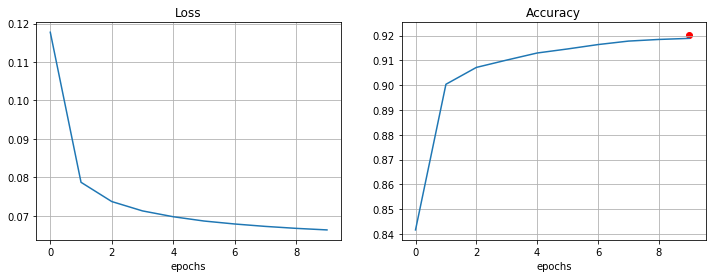

In [0]:
plt.figure(figsize=(12,4))
plt.subplot(1, 2, 1)
plt.title('Loss')
plt.xlabel('epochs')
plt.plot(range(epochs),loss_train)
plt.grid()
plt.subplot(1, 2, 2)
plt.title('Accuracy')
plt.xlabel('epochs')
plt.plot(range(epochs),accuracy_train)
plt.scatter(epochs-1,accuracy_test,c='r')
plt.grid()
plt.show()

In [0]:
# Результаты NN 784 10 (отработано на Colab (TPU))
# Скорость отличается в 10 раз

# epochs = 10
#     дле batch_size = 1
#       0:10:49
#       loss_train = 0.06628973037004471
#       accuracy_train = 0.9189
#       accuracy_test  = 0.9202
#     дле batch_size = 32
#       0:01:27
#       loss_train = 0.002468627644702792
#       accuracy_train = 0.9013
#       accuracy_test  = 0.9056

